# Financial and Risk Analytics course - Vodafone Big Data Lab

## Course Project "Portfolio Selection Strategies"

### Your Name and e-mail

#### Import libraries

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as datetime
import numpy as np
import math
# %matplotlib inline

In [106]:
try:
    import pandas_datareader as web
except:
    !pip install pandas_datareader
    import pandas_datareader as web

In [107]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 1000)

#### Load data

In [108]:
tickers = ['MSFT', 'F', 'JPM', 'GOOG', 'HPQ', 'C', 'HOG', 'VZ', 'AAPL', 'IBM', 'T', 'CSCO', 'BAC', 'INTC', 'AMD', 'SNE', 'NVDA', 'AMZN', 'MS', 'BK']

In [109]:
try:
    df2019_2020 = pd.read_csv('ts2019_2020.csv')
    df2019_2020['Date'] = pd.to_datetime(df2019_2020['Date'])
except:
    df1 = web.DataReader(tickers, data_source='yahoo', start='2018-11-01', end='2020-12-31')
    df1.index = df1.index.strftime('%m/%d/%Y')
    df1['Adj Close'].to_csv('ts2019_2020.csv')
    df2019_2020 = pd.read_csv('ts2019_2020.csv')

In [110]:
try:
    df2008_2009 = pd.read_csv('ts2008_2009.csv')
    df2008_2009['Date'] = pd.to_datetime(df2008_2009['Date'])
except:
    df2 = web.DataReader(tickers, data_source='yahoo', start='2007-11-01', end='2009-12-31')
    df2.index = df2.index.strftime('%m/%d/%Y')
    df2['Adj Close'].to_csv('ts2008_2009.csv')
    df2008_2009 = pd.read_csv('ts2008_2009.csv')

In [111]:
df2008_2009['AAPL'].mean()

4.536463824383942

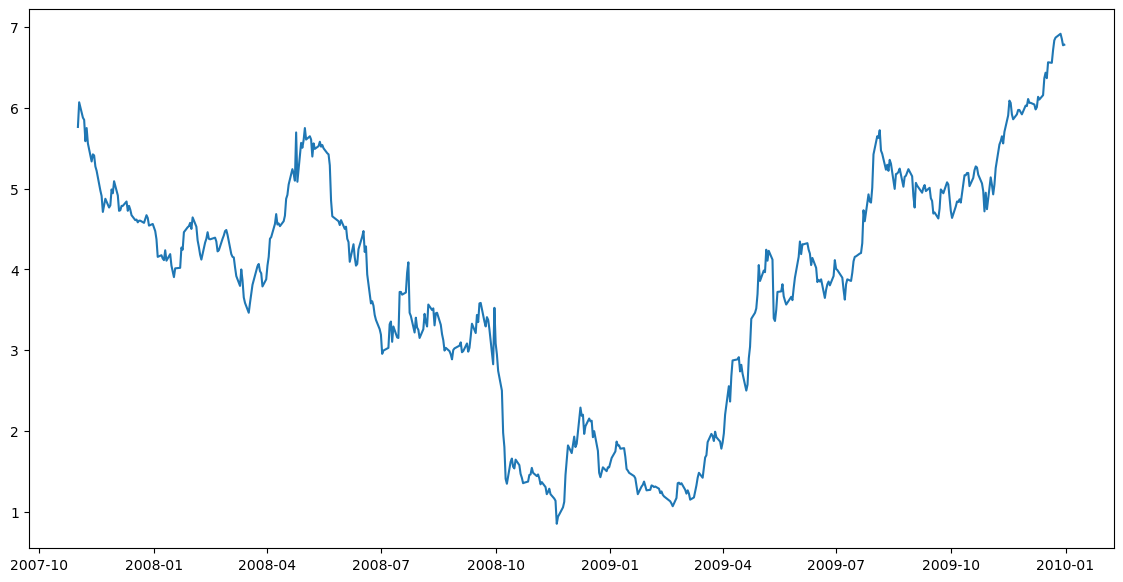

In [112]:
# https://colab.research.google.com/drive/1ulDSw7DEJH1SYRVwvtJXYU0naFgaaBiR#scrollTo=dc2w0ug83tHU
plt.figure(figsize=(14, 7))
X = df2008_2009['Date']
Y = df2008_2009['F']
plt.plot(X, Y)

#### Portfolio selection strategies

In [115]:
# Complete the following functions
# current positions = x_init
# current cash = cash_init

def strat_buy_and_hold(x_init, cash_init, mu, Q, cur_prices):
    x_optimal = x_init
    cash_optimal = cash_init
    
    print(f'------- X: {x_init}\n Cash: {cash_init}\n mu: {mu}\n Q: {Q}\n prices: {cur_prices}\n -------')
    
    return x_optimal, cash_optimal

def strat_equally_weighted(x_init, cash_init, mu, Q, cur_prices):

    return x_optimal, cash_optimal

def strat_min_variance(x_init, cash_init, mu, Q, cur_prices):

    return x_optimal, cash_optimal

def strat_max_Sharpe(x_init, cash_init, mu, Q, cur_prices):

    return x_optimal, cash_optimal

def strat_your_strategy(x_init, cash_init, mu, Q, cur_prices):

    return x_optimal, cash_optimal

#### Executing strategies

In [116]:
# Input file
input_file_prices = 'ts2019_2020.csv'

# Read data into a dataframe
df = pd.read_csv(input_file_prices)

# Convert dates into array [year month day]
def convert_date_to_array(datestr):
    temp = [int(x) for x in datestr.split('/')]
    return [temp[-1], temp[0], temp[1]]

dates_array = np.array(list(df['Date'].apply(convert_date_to_array)))
data_prices = df.iloc[:, 1:].to_numpy()
dates = np.array(df['Date'])

# Find the number of trading days in Nov-Dec 2018 and
# compute expected return and covariance matrix for period 1
day_ind_start0 = 0
day_ind_end0 = len(np.where(dates_array[:,0]==2018)[0])
# print(f'Start: {day_ind_start0}, End: {day_ind_end0}')

# calculate returns for 40 days
cur_returns0 = data_prices[day_ind_start0+1:day_ind_end0,:] / data_prices[day_ind_start0:day_ind_end0-1,:] - 1
# print(f'Returns: {cur_returns0}')

# Mu is mean of the returns
mu = np.mean(cur_returns0, axis = 0)
# print(f'Mu shape: {mu.shape} Mu: {mu}')

# covariance of the returns
Q = np.cov(cur_returns0.T)
# print(f'Covariance: {Q}')

# Remove datapoints for year 2018
data_prices = data_prices[day_ind_end0:,:]
dates_array = dates_array[day_ind_end0:,:]
dates = dates[day_ind_end0:]
# print(f'Dates count: {len(dates)}')

# Initial positions in the portfolio
init_positions = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1045, 0, 0, 0, 0, 0, 0, 0, 0, 0, 20000])

# Initial value of the portfolio
init_value = np.dot(data_prices[0,:], init_positions)
# print('\nInitial portfolio value = $ {}\n'.format(round(init_value, 2)))

# Initial portfolio weights
w_init = (data_prices[0,:] * init_positions) / init_value
# print(f'Shape: {w_init.shape} Portfolio weights: {w_init}')

# Number of periods, assets, trading days
N_periods = 6*len(np.unique(dates_array[:,0])) # 6 periods per year
N = len(df.columns)-1
N_days = len(dates)
# print(f'Periods: {N_periods} N: {N} NDays: {N_days}')

# Annual risk-free rate for years 2019-2020 is 2.5%
r_rf = 0.025
# Annual risk-free rate for years 2008-2009 is 4.5%
r_rf2008_2009 = 0.045

# Number of strategies
strategy_functions = ['strat_buy_and_hold', 'strat_equally_weighted', 'strat_min_variance', 'strat_max_Sharpe', 'strat_your_strategy']
strategy_names     = ['Buy and Hold', 'Equally Weighted Portfolio', 'Mininum Variance Portfolio', 'Maximum Sharpe Ratio Portfolio', 'Your Own Strategy']
N_strat = 1  # comment this in your code
#N_strat = len(strategy_functions)  # uncomment this in your code
fh_array = [strat_buy_and_hold, strat_equally_weighted, strat_min_variance, strat_max_Sharpe]

portf_value = [0] * N_strat
x = np.zeros((N_strat, N_periods),  dtype=np.ndarray)
cash = np.zeros((N_strat, N_periods),  dtype=np.ndarray)

for period in range(1, N_periods+1):
        
    # Compute current year and month, first and last day of the period
    if dates_array[0, 0] == 19:
        cur_year  = 19 + math.floor(period/7)
    else:
        cur_year  = 2019 + math.floor(period/7)

    cur_month = 2*((period-1)%6) + 1
    day_ind_start = min([i for i, val in enumerate((dates_array[:,0] == cur_year) & (dates_array[:,1] == cur_month)) if val])
    day_ind_end = max([i for i, val in enumerate((dates_array[:,0] == cur_year) & (dates_array[:,1] == cur_month+1)) if val])
    print('\n ========Period {0}: start date {1}, end date {2}'.format(period, dates[day_ind_start], dates[day_ind_end]))

    # Prices for the current day
    cur_prices = data_prices[day_ind_start,:]

    # Execute portfolio selection strategies
    for strategy in range(N_strat):

        # Get current portfolio positions
        if period == 1:
            curr_positions = init_positions
            curr_cash = 0
            portf_value[strategy] = np.zeros((N_days, 1))
        else:
            curr_positions = x[strategy, period-2]
            curr_cash = cash[strategy, period-2]

        # Compute strategy
        x[strategy, period-1], cash[strategy, period-1] = fh_array[strategy](curr_positions, curr_cash, mu, Q, cur_prices)

        # Verify that strategy is feasible (you have enough budget to re-balance portfolio)
        # Check that cash account is >= 0
        # Check that we can buy new portfolio subject to transaction costs

        ###################### Insert your code here ############################

        # Compute portfolio value
        p_values = np.dot(data_prices[day_ind_start:day_ind_end+1,:], x[strategy, period-1]) + cash[strategy, period-1]
        portf_value[strategy][day_ind_start:day_ind_end+1] = np.reshape(p_values, (p_values.size,1))
        print('  Strategy "{0}", value begin = $ {1:.2f}, value end = $ {2:.2f}'.format( strategy_names[strategy], 
             portf_value[strategy][day_ind_start][0], portf_value[strategy][day_ind_end][0]))


        # Compute expected returns and covariances for the next period
        cur_returns = data_prices[day_ind_start+1:day_ind_end+1,:] / data_prices[day_ind_start:day_ind_end,:] - 1
        mu = np.mean(cur_returns, axis = 0)
        Q = np.cov(cur_returns.T)



 ========Period 1: start date 01/02/2019, end date 02/28/2019
------- X: [    0     0     0     0     0     0     0     0     0  1045     0     0
     0     0     0     0     0     0     0 20000]
 Cash: 0
 mu: [-0.00068495 -0.00479661 -0.00268931 -0.00060713 -0.00417593 -0.00562475
 -0.00311187  0.0001764  -0.00828419 -0.00020329 -0.00157832 -0.00107454
 -0.00276643 -0.0002792  -0.00118734 -0.00341627 -0.01127996 -0.00207387
 -0.00353687 -0.00011864]
 Q: [[ 5.75992927e-04  1.91433256e-04  2.86837486e-04  4.37248974e-04
   4.29040368e-04  3.76762957e-04  3.16478689e-04  1.44311379e-04
   5.33053943e-04  3.77036994e-04  2.11897583e-04  4.95796607e-04
   3.41449018e-04  4.40642919e-04  7.14073763e-04  3.65241710e-04
   5.49653483e-04  7.31907743e-04  3.95236926e-04  1.64389783e-04]
 [ 1.91433256e-04  3.48240943e-04  1.81412876e-04  1.47540941e-04
   1.62637107e-04  2.31199623e-04  2.34963840e-04  3.31836602e-05
   1.38900998e-04  1.63622583e-04  1.84414167e-04  1.58880611e-04
   2.254958

In [9]:
# Plot results
###################### Insert your code here ############################